In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = "checkouts_5yr.csv"

checkouts = pd.read_csv(file)

In [2]:
checkouts["MaterialType"].value_counts()

#checkouts.head()

BOOK         3458902
EBOOK        1560880
AUDIOBOOK     602173
Name: MaterialType, dtype: int64

In [3]:
checkouts["MaterialType"].value_counts()

#checkouts.head()

#checkouts_sum = checkouts["Checkouts"].sum()
#checkouts_sum

#Group By Material Type
gb_MatType = checkouts.groupby(['MaterialType','CheckoutYear'])
funcs = {'Checkouts':'sum'}
MatType_agg = gb_MatType.agg(funcs)

MatType_agg

#MatType_agg.columns
#Verify the sum of checkouts in the agg equal original. 
#MatTyp_agg_sum = MatType_agg["Checkouts"].sum()
#MatTyp_agg_sum


Checkouts
MaterialType CheckoutYear           
AUDIOBOOK    2015             298086
             2016             366329
             2017             473493
             2018             608849
             2019             265428
BOOK         2015            2537572
             2016            2428844
             2017            2581354
             2018            2473703
             2019             900811
EBOOK        2015             844923
             2016             892088
             2017            1026740
             2018            1149972
             2019             466740

In [4]:
MatTypes = {"MaterialType": checkouts.MaterialType.unique()}
df_MatTypes = pd.DataFrame(MatTypes, columns =["MaterialType"])
df_MatTypes['key'] = 0
print(df_MatTypes)

CoYears = {"CheckoutYear": checkouts.CheckoutYear.unique()}
df_CoYears = pd.DataFrame(CoYears, columns =["CheckoutYear"])
df_CoYears['key'] = 0
print(df_CoYears)

merge_MatTypes_CoYears = pd.merge(df_MatTypes, df_CoYears, on = 'key', how="outer")
merge_MatTypes_CoYears
print(merge_MatTypes_CoYears)

merged_MatTypebyCoYear = pd.merge(merge_MatTypes_CoYears[['MaterialType','CheckoutYear']], MatType_agg, how ="left", on=['MaterialType','CheckoutYear'])
merged_MatTypebyCoYear

  MaterialType  key
0         BOOK    0
1        EBOOK    0
2    AUDIOBOOK    0
   CheckoutYear  key
0          2018    0
1          2019    0
2          2016    0
3          2017    0
4          2015    0
   MaterialType  key  CheckoutYear
0          BOOK    0          2018
1          BOOK    0          2019
2          BOOK    0          2016
3          BOOK    0          2017
4          BOOK    0          2015
5         EBOOK    0          2018
6         EBOOK    0          2019
7         EBOOK    0          2016
8         EBOOK    0          2017
9         EBOOK    0          2015
10    AUDIOBOOK    0          2018
11    AUDIOBOOK    0          2019
12    AUDIOBOOK    0          2016
13    AUDIOBOOK    0          2017
14    AUDIOBOOK    0          2015


,MaterialType,CheckoutYear,Checkouts
0,BOOK,2018,2473703
1,BOOK,2019,900811
2,BOOK,2016,2428844
3,BOOK,2017,2581354
4,BOOK,2015,2537572
5,EBOOK,2018,1149972
6,EBOOK,2019,466740
7,EBOOK,2016,892088
8,EBOOK,2017,1026740
9,EBOOK,2015,844923


In [5]:
#y_2015 = merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] == '2015'].groupby("MaterialType","CheckoutYear")['Checkouts']
#print(y_2015)

#pivot_MatTypebyCOYear = merged_MatTypebyCoYear.pivot_table('Checkouts','MaterialType','CheckoutYear')
#print(pivot_MatTypebyCOYear)

y_2015= merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] ==2015].groupby('MaterialType')['Checkouts'].max()
y_2016= merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] ==2016].groupby('MaterialType')['Checkouts'].max()
y_2017= merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] ==2017].groupby('MaterialType')['Checkouts'].max()
y_2018= merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] ==2018].groupby('MaterialType')['Checkouts'].max()
y_2019= merged_MatTypebyCoYear.loc[merged_MatTypebyCoYear['CheckoutYear'] ==2019].groupby('MaterialType')['Checkouts'].max()


df_MatTypebyYears = pd.DataFrame({
    "2015": y_2015
    , "2016": y_2016
    , "2017": y_2017
    , "2018": y_2018
    , "2019": y_2019
})
df_MatTypebyYears

merged2_MatTypebyCoYear = pd.merge(df_MatTypes[['MaterialType']], df_MatTypebyYears, how ="left", on=['MaterialType'])
merged2_MatTypebyCoYear

,MaterialType,2015,2016,2017,2018,2019
0,BOOK,2537572,2428844,2581354,2473703,900811
1,EBOOK,844923,892088,1026740,1149972,466740
2,AUDIOBOOK,298086,366329,473493,608849,265428


In [6]:
#list columns
list(merged2_MatTypebyCoYear.columns.values)

#set the index
merged2_MatTypebyCoYear = merged2_MatTypebyCoYear.set_index('MaterialType')

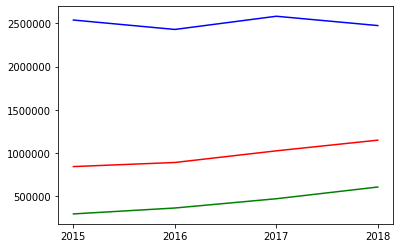

In [7]:
#create AudioBook plot
Audiobook, = plt.plot(["2015","2016","2017","2018"], merged2_MatTypebyCoYear.loc['AUDIOBOOK',["2015","2016","2017","2018"]]
                , color = "green", label = merged2_MatTypebyCoYear.loc['AUDIOBOOK'])

Ebook, = plt.plot(["2015","2016","2017","2018"], merged2_MatTypebyCoYear.loc['EBOOK',["2015","2016","2017","2018"]]
                , color = "red", label = merged2_MatTypebyCoYear.loc['EBOOK'])

Book, = plt.plot(["2015","2016","2017","2018"], merged2_MatTypebyCoYear.loc['BOOK',["2015","2016","2017","2018"]]
                , color = "blue", label = merged2_MatTypebyCoYear.loc['BOOK'])

plt.show()

In [8]:
(merged2_MatTypebyCoYear.loc['AUDIOBOOK',["2015","2016","2017","2018"]]).values

array([298086, 366329, 473493, 608849], dtype=int64)

In [9]:
N = 4
ab = (merged2_MatTypebyCoYear.loc['AUDIOBOOK',["2015","2016","2017","2018"]].values
eb = merged2_MatTypebyCoYear.loc['EB',["2015","2016","2017","2018"]].values
b = merged2_MatTypebyCoYear.loc['BOOK',["2015","2016","2017","2018"]].values

ind = np.arrange(N)
width = 0.35

p1 = plt.bar(ind, ab, width)
p2 = plt.bar(ind, eb, width)
p3 = plt.bar(ind, b, width)

plt.ylabel('Checkouts')
plt.title('Checkouts by Material Type and Year')
plt.xticks(ind, ("2015", "2016", "2017", "2018"))
plt.yticks(np.arrange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ("Audio Book","E-Book", "Book"))

plt.show()



SyntaxError: invalid syntax (<ipython-input-9-4fd93d18ce17>, line 3)